In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.stats import linregress
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)
import time
%matplotlib ipympl

In [2]:

from scipy import signal

sos = signal.butter(3, [1,100], 'bp', fs=10000, output='sos')

In [3]:
time = np.arange(0,12000,.1)

In [4]:
EEGs = np.load('1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/EEGs.npy',allow_pickle=True).item()
total = np.load('1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/total.npy')



In [5]:
EEGs['L5_UPC']

array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.01714084e-12, -3.41731903e-19],
       [-7.53863379e-12, -1.79437313e-18],
       ...,
       [-2.63660609e-10, -6.41549217e-16],
       [-2.39510182e-10, -7.29426359e-16],
       [-2.11474333e-10, -8.20810981e-16]])

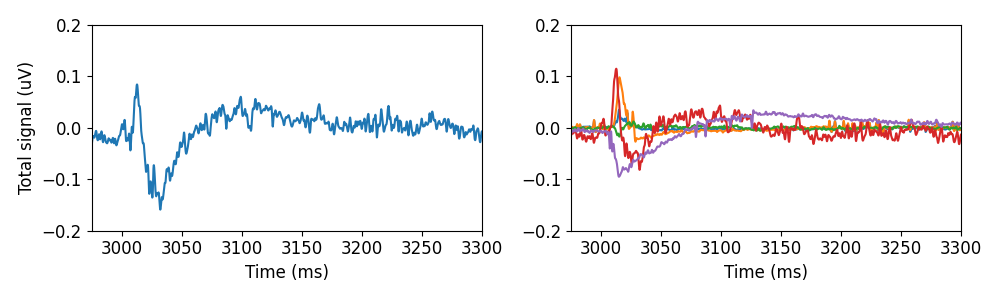

In [11]:
plt.figure(figsize=(10,3))



plt.subplot(1,2,1)
plt.plot(time,(total[:,0]-np.mean(total[:,0]))*1e6)
# plt.ylabel('Amplitude (au)')
plt.xlim([2975,3300])
# # plt.gca().set_xticklabels([])
plt.ylim([-.2,.2])
plt.ylabel('Total signal (uV)')
plt.xlabel('Time (ms)')

plt.subplot(1,2,2)
for layer in np.arange(2,7):
    signal = 0
    for t in EEGs.keys():
        if str(layer) in t:
            try:
                signal += EEGs[t][:,0]
            except:
                pass

    plt.plot(time,(signal-np.mean(signal))*1e6)
    
# plt.legend(np.arange(2,7))
plt.xlim([2975,3300])
plt.ylim([-.2,.2])
# plt.ylabel('Amplitude (au)')
plt.xlabel('Time (ms)')
# plt.title('Contribution by layer')

plt.tight_layout()

In [2]:
out1 = np.genfromtxt('9/reporting/out.dat')
out2 = np.genfromtxt('/gpfs/bbp.cscs.ch/project/proj83/scratch/home/isbister/post_physiology_2023/sim_data/debugging_tests/5_debugging_test_30-11-23/2919081d-a24b-4961-8f53-998f2af9f620/0/reporting/out.dat')


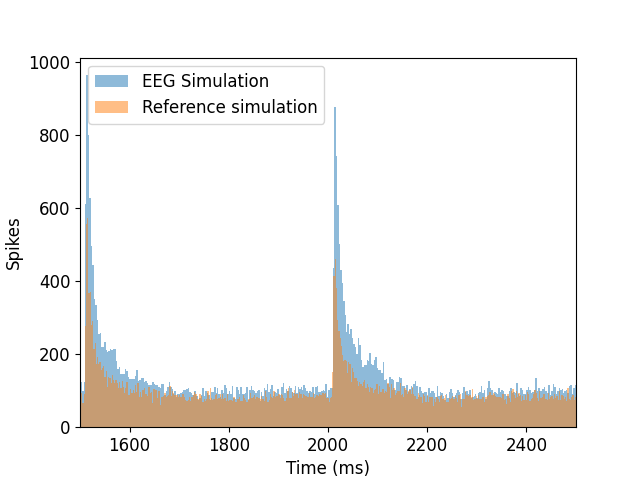

In [3]:
plt.figure()
plt.hist(out1[:,0],bins=1000,alpha=0.5)
plt.hist(out2[:,0],bins=1000,alpha=0.5)
plt.xlim([1500,2500])
plt.legend(['EEG Simulation','Reference simulation'])
plt.xlabel('Time (ms)')
plt.ylabel('Spikes')
plt.show()